<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/convolutional_neural_network_exemple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example : CNN on CIFAR10 dataset

The CIFAR10 dataset is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. The 10 categories are 'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'<br>
In this example, we build a Convolutional neural network that will recognize images from the CIFAR10 dataset.

## Srep 1 : Download the CIFAR10 Dataset
In the cell below, we load the CIFAR-10 data set. We create a dictionary of the labels and their descriptions.

In [ ]:
class_names = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Step 2: displaying images from the training dataset
* we first display a single image
* secondly, we display an image of all possible labels.

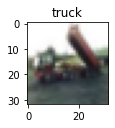

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1.5,1.5))
plt.title(class_names[y_train[2][0]])
plt.imshow(x_train[2])
plt.show()

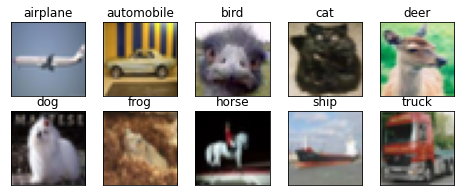

In [ ]:
import numpy as np

class_names = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## Data preprocessing
In the CIFAR10 dataset 32x32 pixels are used to modelized each image. The pixel values are in the range of 0 to 255 for each of the red, green, and blue channels. It’s good practice to work with normalized data. We standardize the pixel values to the [0, 1] range by devising each pixel value by 255.

In [ ]:
x_train_scale = x_train / 255
x_test_scale = x_test / 255

## Build the CNN model
he convolutional neural network will be a stack of altered Conv2D and MaxPooling2d layers. Then a feedforward neural network will be added on top. In other words, we add Fully connected layers on top. We explain the working of each layer in the CNN model:
* layer1 is the Conv2d layer which convolves the image using 32 filters each of size (3*3). 
* layer2 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2). 
* layer3 is the Conv2d layer which convolves the image using 64 filters each of size (3*3).
* layer4 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2). 
* layer5 is the Conv2d layer which convolves the image using 128 filters each of size (3*3).
* layer6 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2).
* layer7 is the Conv2d layer which convolves the image using 256 filters each of size (3*3).
* layer8 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2).
* layer9 is flattening the output obtained from layer8 and this flattens output is passed to layer10. 
* layer10 is a hidden layer of a neural network containing 128 neurons.
* layer11 is a hidden layer of a neural network containing 64 neurons.
* layer12 is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

In [ ]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dropout,Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
#model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 128)       

## Compile and Train the Model
We can now compile the model using the "categorical_crossentropy" loss function and the adam algorithm for the optimizer.<br>
Then we can fit this model with 45 epochs. The model doesn't know the batch size since we didn't specify it, so it is set to None. When the training will start, if the batch size is unspecified, the fit method will set it to 32. The training set contains about $50000\times0.9=45000$ images. The validation set contains $50000*0.1=5000$. We have 50,000 images that will be fed to the network by batches of 32 images. Then, it will take $45000/32\approx 1406.25$ steps to see all the images per epoch.

In [ ]:
#compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#TRAIN_HIST = model.fit(x_train_scale,y_train_cat,batch_size=32,epochs=100)
TRAIN_HIST = model.fit(x_train_scale,y_train,epochs=35,validation_split=0.1,verbose=0)

## Display the Model Training History:<br>

* summarize history for accuracy
* summarize history for loss

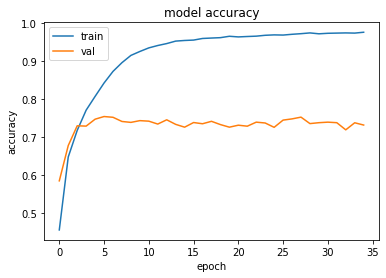

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(TRAIN_HIST.history['accuracy'])
plt.plot(TRAIN_HIST.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

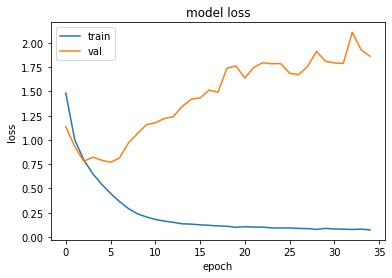

In [ ]:
# summarize history for loss
plt.plot(TRAIN_HIST.history['loss'])
plt.plot(TRAIN_HIST.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluate the model and use the model on a picked image over the test set
We evaluate the model:

In [ ]:
model.evaluate(x_test_scale,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.1130 - accuracy: 0.7253


[2.113048553466797, 0.7253000140190125]

We randomly choose an image from the test to use the model on it:

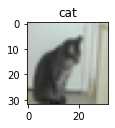

In [ ]:
import numpy as np
np.random.seed(1998)
index = np.random.randint(x_test.shape[0])
image_to_test = x_test[index,::]
label_image_to_test = y_test[index]

import matplotlib.pyplot as plt
plt.figure(figsize=(1.5,1.5))
plt.title(class_names[label_image_to_test[0]])
plt.imshow(image_to_test)
plt.show()

* Before to pass the image to the CNN, we have to reshape it
* Then model creates a probability vector
* We take the indice of the maximum value using np.argmax 

In [ ]:
pred_proba = model.predict(image_to_test.reshape(1,32,32,3)/255)

pred_class = np.argmax(pred_proba)
pred_class_label = class_names[pred_class]
pred_class_label

1/1 [==============================] - 0s 71ms/step


'cat'